# Read data

In [5]:
import pandas as pd

cities = pd.read_csv('city.csv')
cities.head(5)

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


# Sort and select 30 most populated cities

In [6]:
# top 30 cities by population
top30 = cities.sort_values(by=['population'])[::-1][:30]
top30

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221
927,г Казань,420000.0,Россия,Приволжский,Респ,Татарстан,NaN,NaN,г,Казань,...,4,2,92401000000,92701000001,1600,UTC+3,55.794358,49.111497,1216965,1005
782,г Самара,443000.0,Россия,Приволжский,обл,Самарская,NaN,NaN,г,Самара,...,4,2,36401000000,36701000,6300,UTC+4,53.195031,50.106952,1164900,1586
656,г Омск,644000.0,Россия,Сибирский,обл,Омская,NaN,NaN,г,Омск,...,4,2,52401000000,52701000001,5500,UTC+6,54.984857,73.367452,1154000,1716
1064,г Челябинск,454000.0,Россия,Уральский,обл,Челябинская,NaN,NaN,г,Челябинск,...,4,2,75401000000,75701000001,7400,UTC+5,55.160262,61.400808,1130273,1736
757,г Ростов-на-Дону,344000.0,Россия,Южный,обл,Ростовская,NaN,NaN,г,Ростов-на-Дону,...,4,2,60401000000,60701000001,6100,UTC+3,47.222457,39.718803,1091544,1749


### Import libraries

In [7]:
from random import sample, random
from math import radians, sin, cos, atan2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from functools import partial

## Helpful methods

In [8]:
# function to translate latitude distance into km
def lon_lat_to_km(point1, point2):
  lat1, lon1 = point1['geo_lat'], point1['geo_lon']
  lat2, lon2 = point2['geo_lat'], point2['geo_lon']
  radius = 6371  # km
  latitude_dist, longitude_dist = radians(lat2-lat1), radians(lon2-lon1) 
  a = sin(latitude_dist/2) * sin(latitude_dist/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(longitude_dist/2) * sin(longitude_dist/2)
  c = 2 * atan2(a**0.5, (1-a)**0.5)
  return radius*c

In [9]:
# function to calculate the total distance of the current path
def curr_distance(df, path):
  # add the distance between the first and the last city in the path 
  total_dist = lon_lat_to_km(df.iloc[path[0]], df.iloc[path[-1]])
  for i in range(len(path)-1):
    point1, point2 = df.iloc[path[i]], df.iloc[path[i+1]]
    total_dist += lon_lat_to_km(point1,point2)
  return total_dist

# Simulated annealing method

In [10]:
# simulated annealing

def sim_annealing(T, stop_T, cool_rate, old_path, df, time):

  paths = [old_path]           # for storing all generated paths
  old_total_dist = curr_distance(df, old_path)
  distances = [old_total_dist] # storing distances

  while T>stop_T:
    print(T, end='\r') 
    new_path = old_path.copy()
    i,j = sample([i for i in range(len(new_path))],2)# choose 2 random cities to swap
    new_path[i], new_path[j] = new_path[j], new_path[i] # swap them 

    new_total_dist = curr_distance(df, new_path)
    dist = new_total_dist - old_total_dist
    alpha = np.exp(-dist/T) 

    u = random()   # generating u ~ U(0;1)
    if u <= alpha: # condition to accept the new state
      old_path = new_path
      old_total_dist = new_total_dist 

    T *= cool_rate # reduce the temperature
    paths.append(old_path)
    distances.append(old_total_dist)  
    time += 1

  return paths, distances,time

## Generate paths for each cooling rate

In [11]:
x0 = [i for i in range(len(top30))] # initial order of the cities

t = 0       # set time step 
T = 10000   # set init temperature
stop_T = 50 # stopping temp
fast_cooling_rate = 0.8
med_cooling_rate = 0.9
slow_cooling_rate = 0.99

fast_paths, fast_dist, fast_t = sim_annealing(T, stop_T, fast_cooling_rate, x0, top30, t)
med_paths, med_dist, med_t = sim_annealing(T, stop_T, med_cooling_rate, x0, top30, t)
slow_paths, slow_dist, slow_t = sim_annealing(T, stop_T, slow_cooling_rate, x0, top30, t)

fast_t = np.linspace(0,fast_t,len(fast_dist))
med_t = np.linspace(0,med_t,len(med_dist))
slow_t = np.linspace(0,slow_t,len(slow_dist))

### Plot the resulting total distances

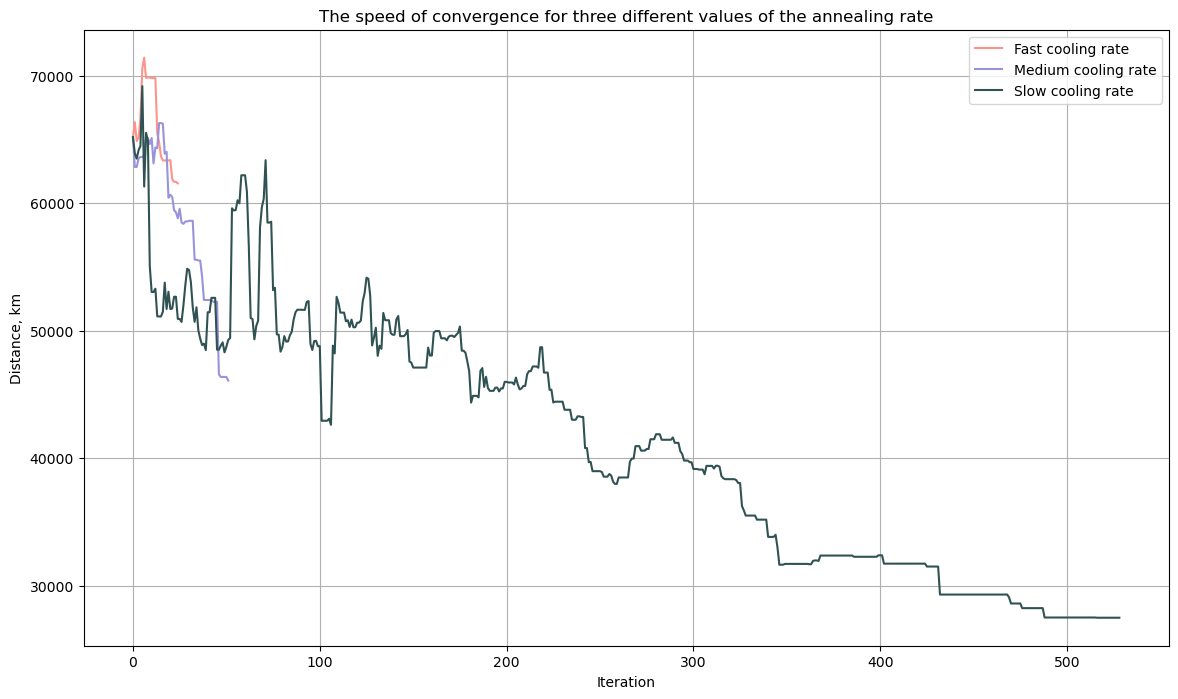

In [12]:
# plot distance optimization over time for each cooling rate
plt.figure(figsize=(14,8))
plt.plot(fast_t, fast_dist, color='#FE938C', label='Fast cooling rate')
plt.plot(med_t, med_dist, color='#9893DA', label='Medium cooling rate')
plt.plot(slow_t, slow_dist, color='#305252', label='Slow cooling rate')

plt.xlabel('Iteration')
plt.ylabel('Distance, km')
plt.title('The speed of convergence for three different values of the annealing rate')

plt.legend()
plt.grid()

### Conclusion

As seen on the figure, the fast annuealing rate allows the distance to converge quickly, at about $30^{th}$ iteration, however, at the cost of accuracy. The convergence is unstable.

The medium cooling rate causes the convergence to occur later, at about $50^{th}$ iteration.

The slow cooling rate coverges much later at $500^{th}$ iteration, but it displays at about half time it became more accurate and most future choices of the path decreased the total distance, rather than increasing it due to inaccuracies, much unlike the previous two cases.

# Animations for each annealing rate

### Make lists of city names in the same order as generated paths to use as node labels in animation

In [16]:
cities_slow = [[top30.iloc[ind]["address"] for ind in path] for path in slow_paths]
cities_medium = [[top30.iloc[ind]["address"] for ind in path] for path in med_paths]
cities_fast = [[top30.iloc[ind]["address"] for ind in path] for path in fast_paths]


### Library for graph visualization

In [14]:
import networkx as nx


### Make overlay

In [17]:
import json
 
# Opening JSON file
with open('russia.json') as json_file:
    source = json.load(json_file)[0]['geojson']['coordinates']

coord = []
for i in source:
    coord = coord + i[0]

# Since some part of Russia is located in west semisphere, for proper display we need to convert such coordinates
# add 360 to the degree value
for i in range(len(coord)):
    x = coord[i][0]
    if x < 0:
        coord[i][0] += 360
coord = np.array(coord)


### Frame update

In [18]:
def update(frame, params):
  city_names, path, ax = params
  # erase last frame
  ax.clear()
  # add the outline of the country
  ax.plot(coord[:,0], coord[:,1], 'bo')

  graph = nx.DiGraph()
  for i in range(len(path[frame])):
    # add named nodes for all cities in path
    lon = top30.iloc[path[frame][i]]['geo_lon']
    lat = top30.iloc[path[frame][i]]['geo_lat']
    graph.add_node(city_names[frame][i], pos=(lon,lat))
    
  # add paths as edges of graph
  for i in range(len(city_names[frame])-1):
    node1, node2 = city_names[frame][i], city_names[frame][i+1]
    graph.add_edge(node1,node2)
  # add edge between the 1st and last node
  graph.add_edge(city_names[frame][0], city_names[frame][-1])
  # draw the graph
  pos=nx.get_node_attributes(graph,'pos')
  nx.draw(graph, pos, with_labels=True, ax=ax)

### Function to save animation

MovieWriter ffmpeg unavailable; using Pillow instead.


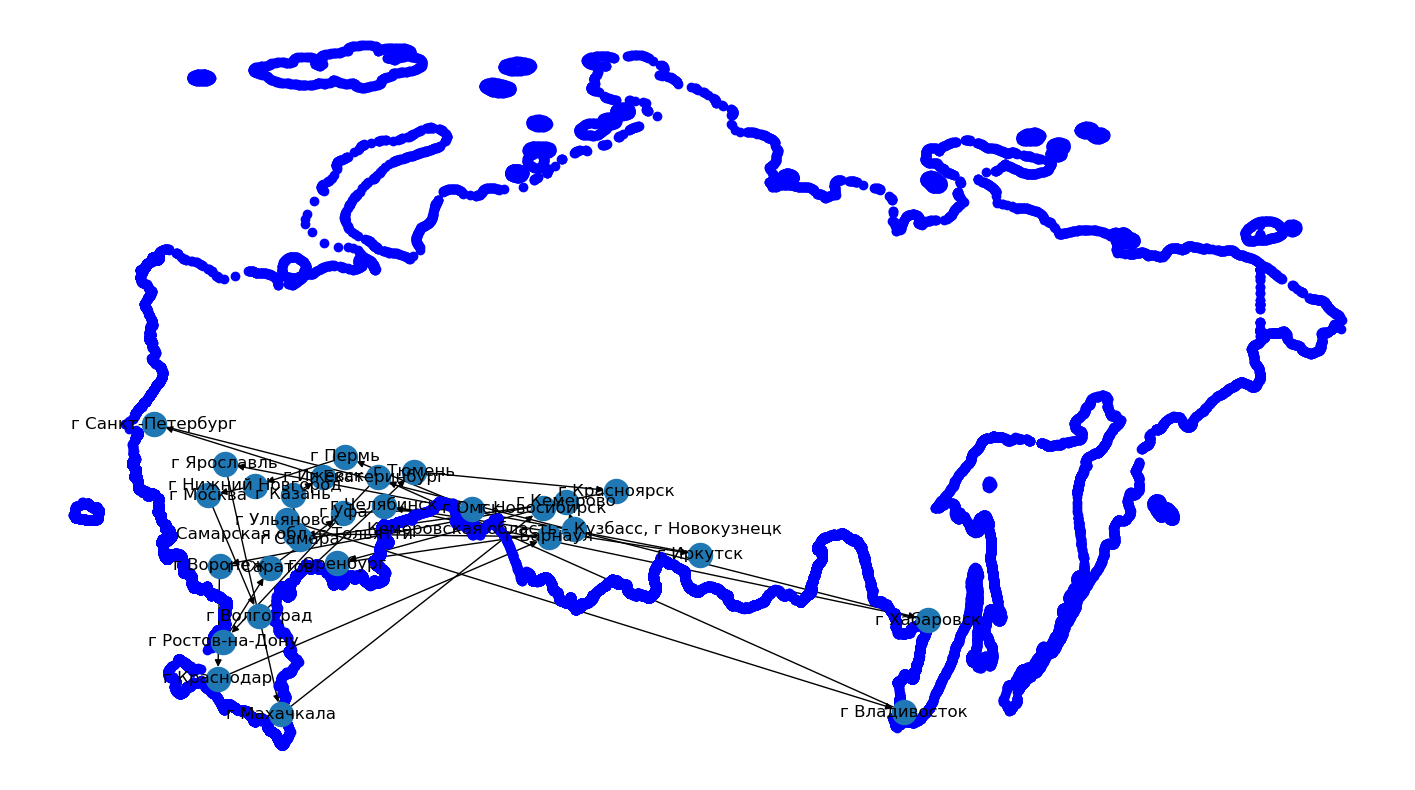

In [ ]:
fig,ax = plt.subplots(figsize=(18,10))
ani = FuncAnimation(fig, partial(update, params=(cities_fast, fast_paths,ax)), frames=len(cities_fast), interval=100)
ani.save('fast_rate.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


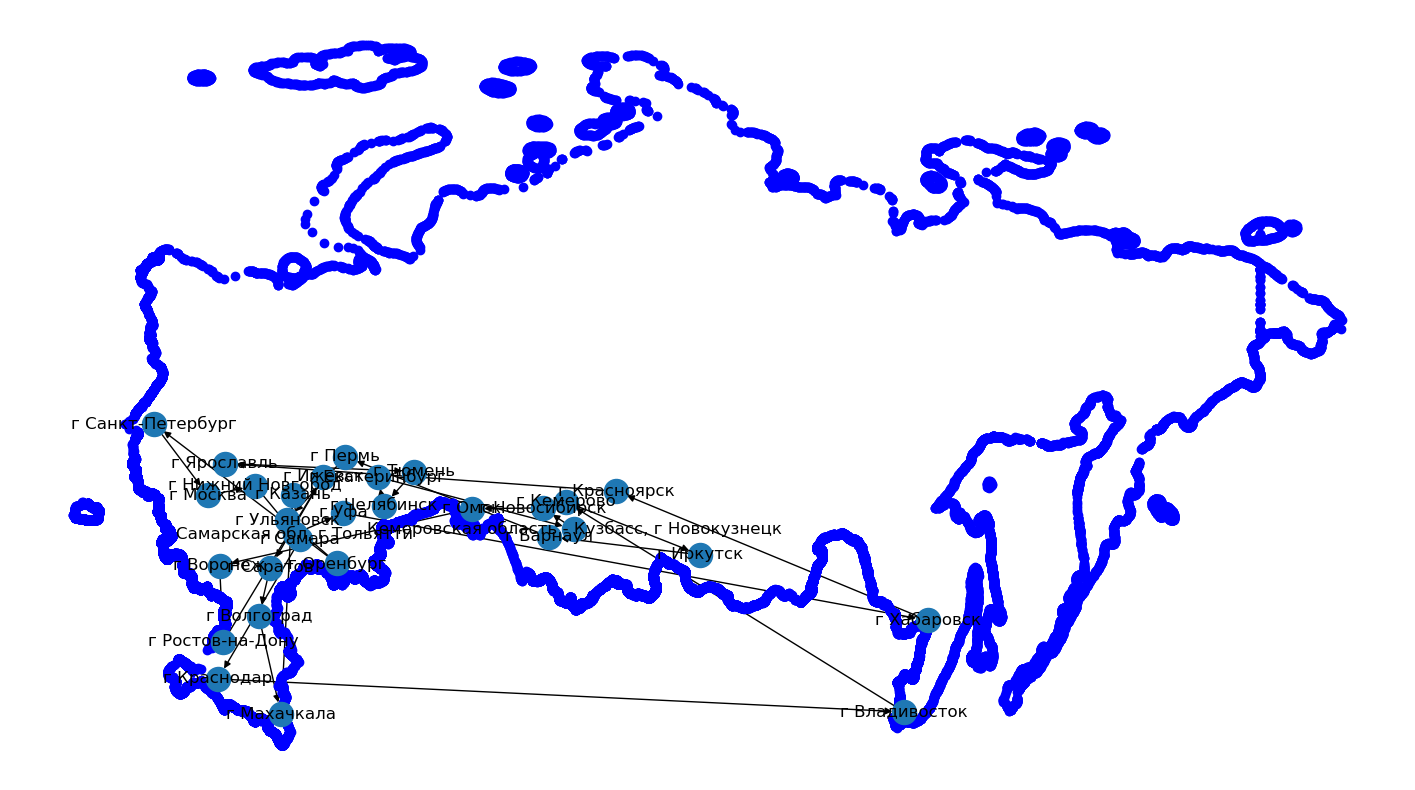

In [ ]:
fig,ax = plt.subplots(figsize=(18,10))
ani = FuncAnimation(fig, partial(update, params=(cities_medium, med_paths,ax)), frames=len(cities_medium), interval=100)
ani.save('med_rate.gif')

In [19]:
fig,ax = plt.subplots(figsize=(18,10))
ani = FuncAnimation(fig, partial(update, params=(cities_slow, slow_paths,ax)), frames=len(cities_slow), interval=100)
ani.save('slow_rate.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
